In [1]:
# Importing pandas and matplotlib
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

# Read in the data collection CSV as a DataFrame
unfiltered_measurements_df = pd.read_csv(input('Enter filepath for .csv file: '))
measurements_df = unfiltered_measurements_df[pd.isna(unfiltered_measurements_df['date']) == False] # remove last NaN row

Enter filepath for .csv file:  ~/measurements.csv


In [2]:
# add dataframe column 'day' to represent the number of days since start of treatment
def add_days_column(dframe):
    start_date = datetime.strptime(dframe.loc[0,'date'], "%m/%d/%y") # datetime object for start of treatment
    
    for i in measurements_df.index:
        timedelta = int((datetime.strptime(dframe.loc[i,'date'], "%m/%d/%y") - start_date).days)
        dframe.loc[i, 'day'] = timedelta
        
    return None

In [3]:
# define a function that determines the average area for each date and test group
def boxplot_by_group(dframe, outliers=True): # input dframe(DataFrame), outlier(boolean)
    # filter outliers if required
    if outliers == True:
        test_df, control_df = dframe[dframe['type'] == 'Test'], dframe[dframe['type'] == 'Control'] # filter by type
    else:
        x = int(input('Enter maximum value (area_mm^2): '))
        test_df = dframe[(dframe['type'] == 'Test') & (dframe['area_mm^2'] <= x)]
        control_df = dframe[(dframe['type'] == 'Control') & (dframe['area_mm^2'] <= x)]
    
    dates = list(dframe['date'].unique())
    days = [int(i) for i in list(dframe['day'].unique())]
    tests = []
    controls = []
    
    for i in dates:
        tests.append(list(test_df[test_df['date'] == i]['area_mm^2']))
        controls.append(list(control_df[control_df['date'] == i]['area_mm^2']))
    
    plt.boxplot(tests, labels=days)
    plt.boxplot(controls, labels=days, patch_artist=True)
    
    if outliers == True:
        plt.title('Test vs Control (blue) with Outliers')
    else:
        plt.title('Test vs Control (blue) w/o Outliers')
        
    plt.xlabel('Days from Start of Treatment')
    plt.ylabel('Area (mm^2)')
    plt.legend(['Control']).get_frame().set_facecolor('C0')
    plt.show();
    
    return None

Enter maximum value (area_mm^2):  200


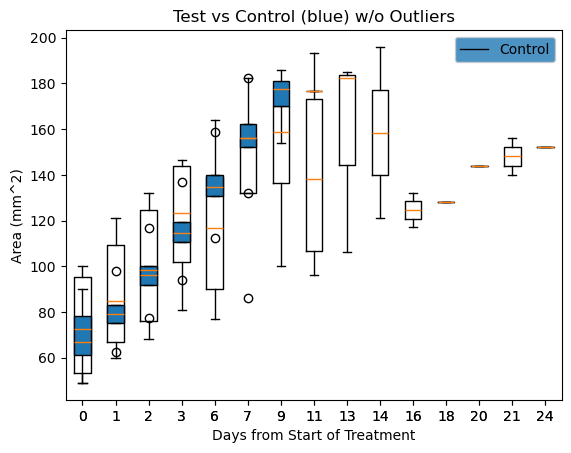

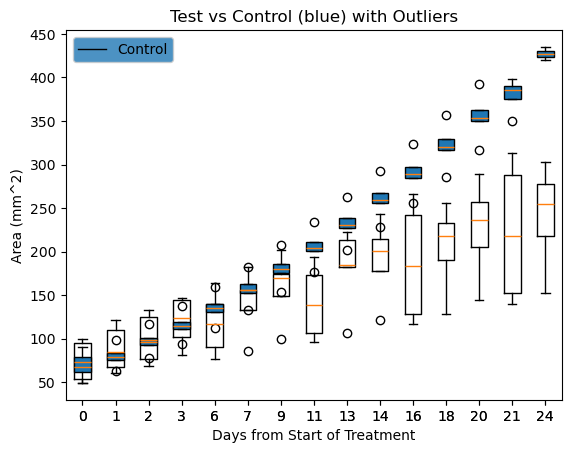

In [4]:
add_days_column(measurements_df);
boxplot_by_group(measurements_df, outliers=False);
boxplot_by_group(measurements_df);